# **Checkpoint 01 - Modelagem de Dados e Aprendizagem de Máquina**

## **Objetivo**
Avaliar conceitos sobre Modelagem de dados e Aprendizado de Máquina (ML) adquiridos no curso.

## **Descrição do Desafio**
Você foi contratado por uma empresa que desenvolveu uma plataforma de compra e venda de carros usados. O funcionamento é bem simples, os usuários cadastram o carro que querem vender e esperam que outro usuário os compre, a empresa então fica com uma parte do valor de venda. Seu papel é desenvolver um modelo que possa determinar qual o melhor preço de venda para um usado.

Para nortear o desenvolvimento, você precisa de um ponto de partida e determinou uma pergunta chave: **Qual o preço de venda de um veículo Volkswagen Sedan 2.0 a gasolina, ano 2005, com cerca de 172095 km rodados?**

### **Orientações**
Para responder a essa pergunta, você deve utilizar o dataset da empresa, que está representado no arquivo **carros.csv**, e seguir o roteiro proposto neste desafio.

## **Exploração de Dados - 2 pontos**

1 - Carregue o dataset e faça a inspeção nas 15 primeiras linhas para identificação dos atributos. Quantos dados existem nesse dataset? Qual a quantidade de atributos? Existem valores faltantes? De que tipo são os dados? (1,0)

In [372]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("carros.csv")

4345 dados por coluna.
9 atributos.
Sim, na colune "Price" e na coluna "EngineV".
Do tipo Floar, Int e Objetos.

In [373]:
df.head(15)

,Brand,Price,Body,Mileage/1000,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.00,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.90,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.00,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.20,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.00,Petrol,yes,2011,Rav 4
5,Mercedes-Benz,199999.0,crossover,0,5.50,Petrol,yes,2016,GLS 63
6,BMW,6100.0,sedan,438,2.00,Gas,yes,1997,320
7,Audi,14200.0,vagon,200,2.70,Diesel,yes,2006,A6
8,Renault,10799.0,vagon,193,1.50,Diesel,yes,2012,Megane
9,Volkswagen,1400.0,other,212,1.80,Gas,no,1999,Golf IV


In [374]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4345 entries, 0 to 4344
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         4345 non-null   object 
 1   Price         4173 non-null   float64
 2   Body          4345 non-null   object 
 3   Mileage/1000  4345 non-null   int64  
 4   EngineV       4195 non-null   float64
 5   Engine Type   4345 non-null   object 
 6   Registration  4345 non-null   object 
 7   Year          4345 non-null   int64  
 8   Model         4345 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 305.6+ KB


2 - Note que os dataset está no sistema americano. Converta os dados para o sistema métrico e altere o cabeçalho de forma que os dados façam sentido. (1,0)

Obs: Os dados de Milhas dividos por mil, ou seja, multiplique o valor por 1.000 para ter o valor real!

In [375]:
df['Km/1000'] = df['Mileage/1000'] * 1.6

In [376]:
df = df.drop(['Mileage/1000'], axis=1)

In [377]:
df = df.drop(['Brand'], axis=1)

In [378]:
df = df.drop(['Body'], axis=1)

In [379]:
df = df.drop(['Engine Type'], axis=1)

In [380]:
df.head()

,Price,EngineV,Registration,Year,Model,Km/1000
0,4200.0,2.0,yes,1991,320,443.2
1,7900.0,2.9,yes,1999,Sprinter 212,683.2
2,13300.0,5.0,yes,2003,S 500,572.8
3,23000.0,4.2,yes,2007,Q7,384.0
4,18300.0,2.0,yes,2011,Rav 4,192.0


## **Analise descritiva dos dados - 2 pontos**

3 - Faça uma análise exploratória dos dados, utilizando gráficos e tabelas para realizar correlações entre os atributos e que permitam criar um cenário de correlação entre eles.

<Axes: >

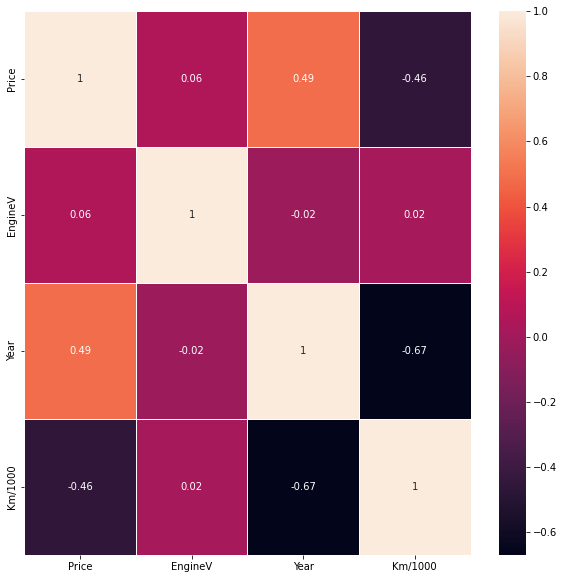

In [381]:
import seaborn as sns
correlation_matrix = df.corr().round(2)
fig, ax =plt.subplots(figsize=(10,10))
sns.heatmap(data=correlation_matrix, annot=True, linewidths=.5, ax=ax)

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='Price', ylabel='Year'>

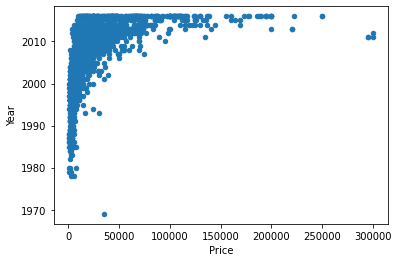

In [382]:
df.plot.scatter(x='Price',
                  y='Year')

In [383]:
df = df.drop(['Registration'], axis=1)

In [384]:
df = df.drop(['Model'], axis=1)

In [385]:
df.head()

,Price,EngineV,Year,Km/1000
0,4200.0,2.0,1991,443.2
1,7900.0,2.9,1999,683.2
2,13300.0,5.0,2003,572.8
3,23000.0,4.2,2007,384.0
4,18300.0,2.0,2011,192.0


A relação mais próxima obtida foi entre Preço e Ano, onde eles são proporcionais, quanto mais recente o carro, maior o preço.

## **Desenvolvimento do Modelo - 2 pontos**

4 - O conjunto de dados indica a aplicação de qual modelo de aprendizagem de máquina para responder a pergunta do desafio? Por quê? (1,0)

Resposta: Regressão

5 - Qual a técnica sugerida para este projeto? Por quê? (1,0)

Resposta:

Com base nas suas respostas, agora escolha dois algortimos para implementar e comparar a performance de cada um deles ao final do desafio.

Resposta:

Algoritmo 1: Regressão Linear

Algoritmo 2: Árvore de Decisão

## **Treinamento e teste do Modelo - 3 pontos**

6 - Crie um subset dos dados que serão utilizados para o treinamento e para o teste do modelo. Divida este subset em treino e teste. (1,0) 

In [386]:
df = df.dropna(axis=0)

In [387]:
df = df[['EngineV', 'Year', 'Km/1000','Price']]

In [388]:
df.head(10)

,EngineV,Year,Km/1000,Price
0,2.0,1991,443.2,4200.0
1,2.9,1999,683.2,7900.0
2,5.0,2003,572.8,13300.0
3,4.2,2007,384.0,23000.0
4,2.0,2011,192.0,18300.0
5,5.5,2016,0.0,199999.0
6,2.0,1997,700.8,6100.0
7,2.7,2006,320.0,14200.0
8,1.5,2012,308.8,10799.0
9,1.8,1999,339.2,1400.0


In [389]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4025 entries, 0 to 4344
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   EngineV  4025 non-null   float64
 1   Year     4025 non-null   int64  
 2   Km/1000  4025 non-null   float64
 3   Price    4025 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 157.2 KB


In [390]:
from sklearn.model_selection import train_test_split
len(df)

4025

In [391]:
x = df.drop(columns=['Price'])
y = df['Price']                

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [392]:
len(x_train), len(x_test), len(y_train), len(y_test)

(3220, 805, 3220, 805)

7 - Faça o treinamento e teste dos 2 algoritmos escolhidos. Utilize uma métrica (ex. R2-score, RMSE e MAE...) para avaliar a performance dos modelos.

7.1 - Algoritmo 1: (0,5)


In [393]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [394]:
lr = LinearRegression()

lr.fit(x_train,y_train)

LinearRegression()

In [395]:
y_predicoes = lr.predict(x_test) 

In [396]:
MAE = mean_absolute_error(y_true = y_test,      # Gabarito
                          y_pred = y_predicoes) # Respostas do algoritmo ao teste realizado
print('MAE: ', MAE)

MAE:  12277.451183277188


In [397]:
R2 = r2_score(y_true = y_test,
              y_pred = y_predicoes)
print('R2: ', R2) 

R2:  0.3005730650987072


7.2 - Algoritmo 2:  (0,5)

In [398]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt.fit(x, y)

DecisionTreeRegressor()

In [399]:
y_predicoes = dt.predict(x_test) 

In [400]:
MAE = mean_absolute_error(y_true = y_test,      # Gabarito
                          y_pred = y_predicoes) # Respostas do algoritmo ao teste realizado
print('MAE: ', MAE)

MAE:  971.546438778903


In [401]:
R2 = r2_score(y_true = y_test,
              y_pred = y_predicoes)
print('R2: ', R2) 

R2:  0.9744193907083202


7.3 - Qual dos algortimos obteve melhor resultado? Por quê? (1,0)

Resposta: A árvore de decisão, pois o R2 apontou um erro de 3%, diferentemente da regressão linear, onde o erro foi de 70%. Além do MAE (quer aponta o número de erros) ter sido menor.

## **Modelo de Produção: Teste com novos dados - 1 ponto**

8 - Use o seu modelo treinado para responder a pergunta do desafio:

In [402]:
#Brand	Price	Body	EngineV, Engine Type,	Year	Km/1000
#Volkswagem, DESCOBRIR, Sedan, 2.0, gas, 2005, 17.2
Carro = pd.DataFrame({
  'EngineV': [2.0],
  'Year': [2005],
  'Km/1000': [17.2]
})


In [407]:
price = dt.predict(Carro)

print(f'O preço do carro é de: $ {price[0]:.2f}')

O preço do carro é de: $ 6700.00
